In [1]:
#import libraries and required functions from NeuralNetwork
import numpy as np
import matplotlib.pyplot as plt
import pickle
from NeuralNetwork import Model, Layer_Dense, Activation_ReLU, Activation_Softmax, Activation_Linear, Activation_Sigmoid, Layer_Dropout
from NeuralNetwork import Layer_Conv2D, Layer_RNN, Optimizer_Adam, Loss_CategoricalCrossentropy, Accuracy_Categorical
from keras.utils import to_categorical

In [2]:
#Load MNIST dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


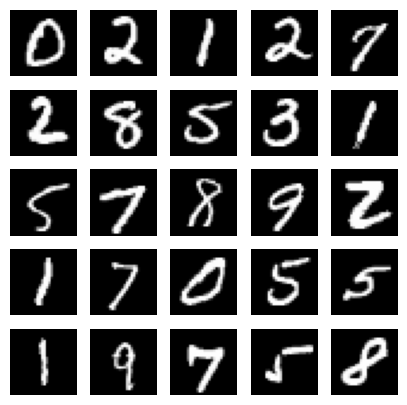

In [4]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [5]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [8]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [9]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [10]:
model=Model()

model.add(Layer_Dense(input_size,hidden_units))
model.add(Activation_ReLU())
model.add(Layer_Dropout(dropout))

model.add(Layer_Dense(hidden_units, hidden_units))
model.add(Activation_ReLU())
model.add(Layer_Dropout(dropout))

model.add(Layer_Dense(hidden_units, num_labels))
model.add(Activation_Softmax())

model.set(
    loss=Loss_CategoricalCrossentropy(),
    optimizer=Optimizer_Adam(learning_rate=0.001,decay=1e-3),
    accuracy=Accuracy_Categorical()
)

model.finalize()

In [11]:
model.summary()


Model Summary:
Layer 1: Layer_Dense
    Weights Shape: (784, 256)
    Biases Shape: (1, 256)
    Trainable Params: 200960
--------------------------------------------------
Layer 2: Activation_ReLU
    Weights Shape: N/A
    Biases Shape: N/A
    Trainable Params: 0
--------------------------------------------------
Layer 3: Layer_Dropout
    Weights Shape: N/A
    Biases Shape: N/A
    Trainable Params: 0
--------------------------------------------------
Layer 4: Layer_Dense
    Weights Shape: (256, 256)
    Biases Shape: (1, 256)
    Trainable Params: 65792
--------------------------------------------------
Layer 5: Activation_ReLU
    Weights Shape: N/A
    Biases Shape: N/A
    Trainable Params: 0
--------------------------------------------------
Layer 6: Layer_Dropout
    Weights Shape: N/A
    Biases Shape: N/A
    Trainable Params: 0
--------------------------------------------------
Layer 7: Layer_Dense
    Weights Shape: (256, 10)
    Biases Shape: (1, 10)
    Trainable Par

In [12]:
model.train(x_train, y_train, 
                epochs=10, batch_size=128,print_every=100, 
                validation_data=(x_test, y_test))

epoch: 1 
step: 0, acc: 0.125, loss: 2.302 (data_loss: 2.302, reg_loss: 0.000), lr: 0.001 
step: 100, acc: 0.828, loss: 0.505 (data_loss: 0.505, reg_loss: 0.000), lr: 0.0009090909090909091 
step: 200, acc: 0.867, loss: 0.418 (data_loss: 0.418, reg_loss: 0.000), lr: 0.0008333333333333334 
step: 300, acc: 0.906, loss: 0.330 (data_loss: 0.330, reg_loss: 0.000), lr: 0.0007692307692307692 
step: 400, acc: 0.898, loss: 0.306 (data_loss: 0.306, reg_loss: 0.000), lr: 0.0007142857142857143 
step: 468, acc: 0.917, loss: 0.338 (data_loss: 0.338, reg_loss: 0.000), lr: 0.000681198910081744 
training, acc: 0.845, loss: 0.522 (data_loss: 0.522, reg_loss: 0.000), lr: 0.000681198910081744 
validation, acc: 0.936, loss: 0.210 
epoch: 2 
step: 0, acc: 0.969, loss: 0.151 (data_loss: 0.151, reg_loss: 0.000), lr: 0.0006807351940095304 
step: 100, acc: 0.914, loss: 0.247 (data_loss: 0.247, reg_loss: 0.000), lr: 0.0006373486297004461 
step: 200, acc: 0.914, loss: 0.224 (data_loss: 0.224, reg_loss: 0.000), lr:

In [13]:
model.evaluate(x_test, y_test, batch_size=128)

validation, acc: 0.976, loss: 0.081 


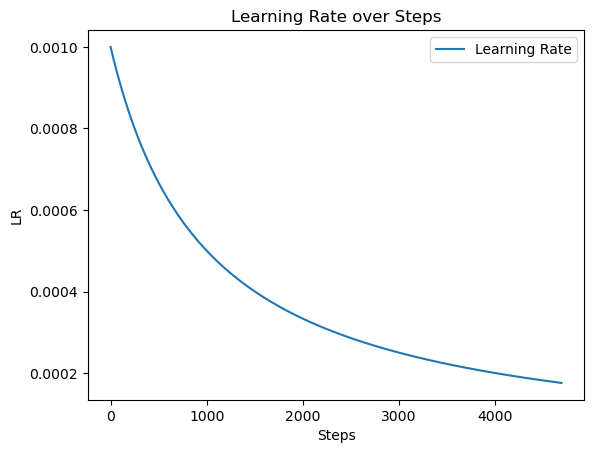

In [14]:
# Plot Learning Rate
plt.plot(model.history['learning_rate'], label='Learning Rate')
plt.xlabel('Steps')
plt.ylabel('LR')
plt.title('Learning Rate over Steps')
plt.legend()
plt.show()

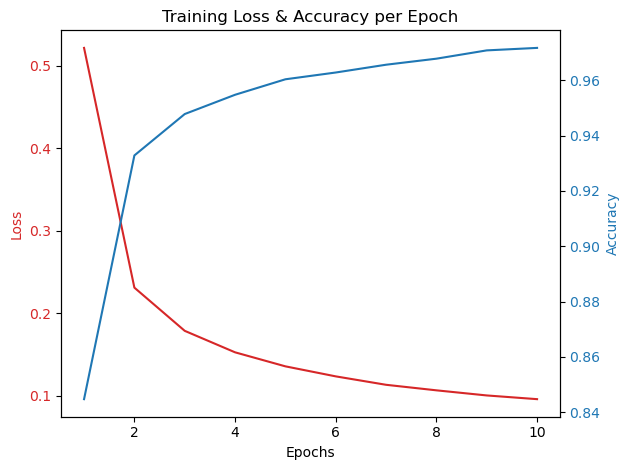

In [15]:
epochs = range(1, len(model.epoch_history['loss']) + 1)  # X-axis

fig, ax1 = plt.subplots()

# Plot Loss
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(epochs, model.epoch_history['loss'], label='Loss', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create second y-axis for Accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(epochs, model.epoch_history['accuracy'], label='Accuracy', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Title and Legends
plt.title('Training Loss & Accuracy per Epoch')
fig.tight_layout()
plt.show()

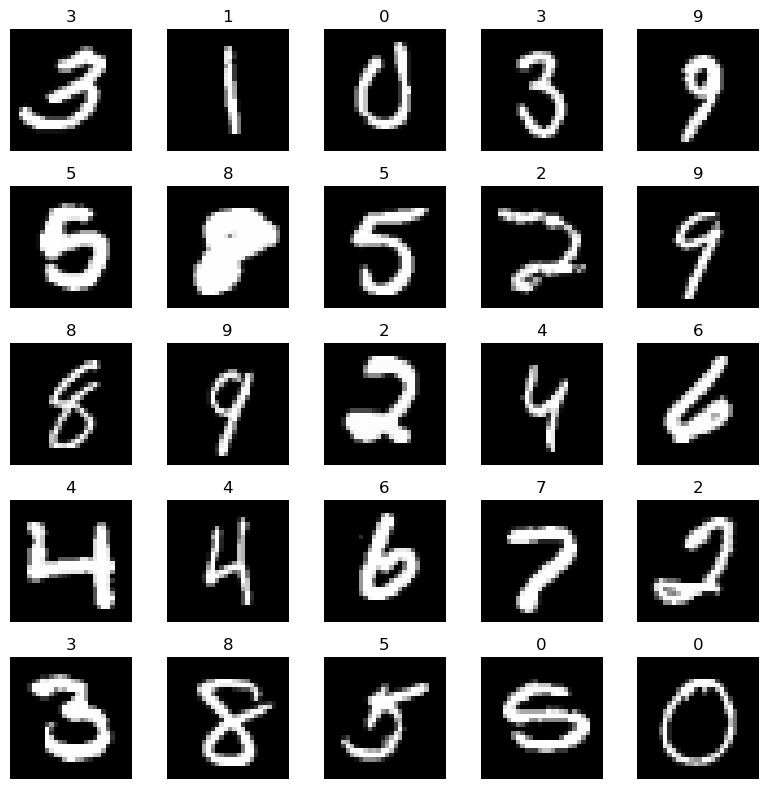

In [16]:
indexes = np.random.randint(0, x_test.shape[0], size=25)
images = x_test[indexes]
actual_labels = y_test[indexes]
predicted_labels = np.argmax(model.predict(images), axis=1)

plt.figure(figsize=(8, 8))  # Bigger figure for better spacing
for i in range(25):
    plt.subplot(5, 5, i + 1)
    image = images[i]

    # Reshape if necessary (for grayscale images like MNIST)
    if len(image.shape) == 1 or image.shape[-1] not in [1, 3]:  
        image = image.reshape(28, 28)

    plt.imshow(image, cmap='gray' if image.ndim == 2 else None)
    plt.axis('off')

    # Set title with actual and predicted labels
    plt.title(f"{predicted_labels[i]}", fontsize=12, color="black")

plt.tight_layout()
plt.show()